In [35]:
import numpy as np
import pandas as pd
import matplotlib as plt
from PIL import Image # used for loading images
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import os # used for navigating to image path
import imageio # used for writing images
import random
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras.layers. normalization import BatchNormalization

from sklearn.model_selection import train_test_split

In [3]:
def label_img(name):
    word_label = name.split('_')[0]
    if word_label == 'men': return np.array([1, 0, 0, 0])
    elif word_label == 'women': return np.array([0, 1, 0, 0])
    elif word_label == 'flowers': return np.array([0,0,1,0])
    elif word_label == 'birds': return np.array([0,0,0,1])

In [47]:
IMG_SIZE = 224

#DIR = '/home/yl2vq/PROJECT/met/logan/Primarysmall/Keras/train'
#TEST_DIR = '/home/yl2vq/PROJECT/met/logan/Primarysmall/Keras/train'

DIR = '/home/yl2vq/PROJECT/met/DATA/kerascul/train'
TEST_DIR = '/home/yl2vq/PROJECT/met/DATA/kerascul/test'


IMG_SIZE = 224

def load_training_data():
    train_data = []
    for img in os.listdir(DIR):
        label = label_img(img)
        path = os.path.join(DIR, img)
        img = Image.open(path)
        img = img.convert('L')
        img = img.resize((IMG_SIZE, IMG_SIZE), Image.ANTIALIAS)
        train_data.append([np.array(img), label])
            
    random.shuffle(train_data)
    return train_data

def load_test_data():
    test_data = []
    for img in os.listdir(TEST_DIR):
        label = label_img(img)
        path = os.path.join(TEST_DIR, img)
        img = Image.open(path)
        img = img.convert('L')
        img = img.resize((IMG_SIZE, IMG_SIZE), Image.ANTIALIAS)
        test_data.append([np.array(img), label])
            
    random.shuffle(test_data)
    return test_data

In [37]:
train_data = load_training_data()

In [48]:
test_data = load_test_data()

In [38]:
train_data[1][0]

array([[248, 247, 248, ..., 245, 244, 244],
       [248, 246, 248, ..., 244, 245, 245],
       [248, 248, 246, ..., 247, 244, 245],
       ...,
       [249, 249, 249, ..., 242, 242, 241],
       [249, 249, 249, ..., 241, 241, 241],
       [249, 249, 249, ..., 241, 241, 241]], dtype=uint8)

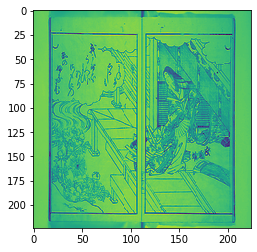

In [39]:
plt.imshow(train_data[500][0])
plt.show()

In [40]:
trainImages = np.array([i[0] for i in train_data]).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
trainLabels = np.array([i[1] for i in train_data])

In [49]:
testImages = np.array([i[0] for i in test_data]).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
testLabels = np.array([i[1] for i in test_data])

In [50]:
model = Sequential()

model.add(Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1),padding='same')) # grey scale
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(4, activation = 'softmax'))

In [53]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics = ['accuracy'])

In [54]:
early_stopping = EarlyStopping() # Callback function

hist = model.fit(trainImages, trainLabels, 
          batch_size = 50, 
          validation_split=0.2, 
          epochs = 10,
          #callbacks=[early_stopping],
          verbose = 1)

Train on 4799 samples, validate on 1200 samples
Epoch 1/10
4799/4799 [==============================] - 156s 33ms/step - loss: 1.5193 - accuracy: 0.3740 - val_loss: 1.4402 - val_accuracy: 0.2642
Epoch 2/10
4799/4799 [==============================] - 152s 32ms/step - loss: 1.2412 - accuracy: 0.4666 - val_loss: 1.2484 - val_accuracy: 0.4275
Epoch 3/10
4799/4799 [==============================] - 152s 32ms/step - loss: 1.1409 - accuracy: 0.5059 - val_loss: 1.2912 - val_accuracy: 0.4608
Epoch 4/10
4799/4799 [==============================] - 152s 32ms/step - loss: 1.1174 - accuracy: 0.5274 - val_loss: 1.1086 - val_accuracy: 0.5225
Epoch 5/10
4799/4799 [==============================] - 152s 32ms/step - loss: 1.0593 - accuracy: 0.5584 - val_loss: 1.3454 - val_accuracy: 0.4283
Epoch 6/10
4799/4799 [==============================] - 153s 32ms/step - loss: 1.0168 - accuracy: 0.5641 - val_loss: 1.0776 - val_accuracy: 0.5317
Epoch 7/10
4799/4799 [==============================] - 152s 32ms/step

In [55]:
model.save_weights('feature.h5')

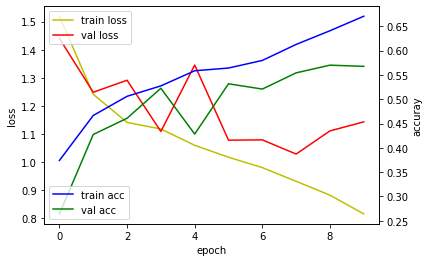

In [60]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [90]:
from keras.models import Model
layer_outputs = [layer.output for layer in model.layers]
activation_model = Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(trainImages[30].reshape(1,224,224,1))
 
def display_activation(activations, col_size, row_size, act_index): 
    activation = activations[act_index]
    activation_index=0
    fig, ax = plt.subplots(row_size, col_size, figsize=(row_size*2.5,col_size*1.5))
    for row in range(0,row_size):
        for col in range(0,col_size):
            ax[row][col].imshow(activation[0, :, :, activation_index], cmap='gray')
            activation_index += 1
        
        
      

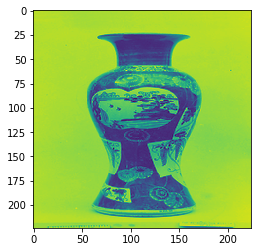

In [89]:
plt.imshow(trainImages[30][:,:,0]);


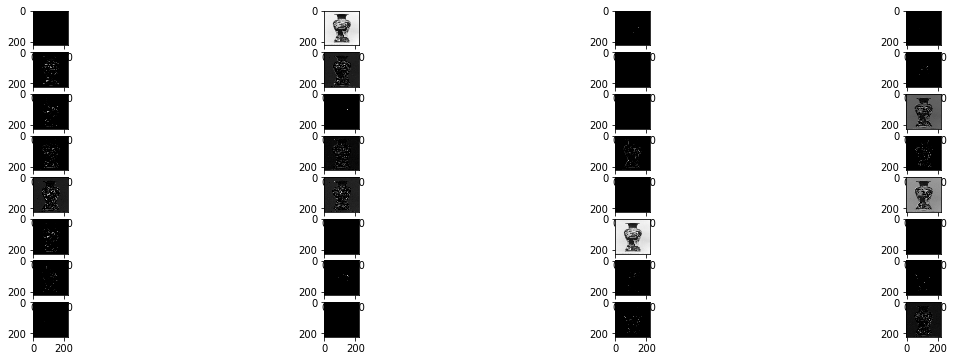

In [123]:
display_activation(activations, 4, 8, 0)


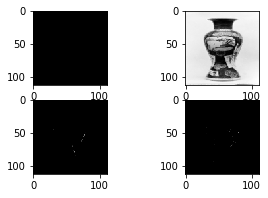

In [128]:
display_activation(activations, 2, 2, 2)

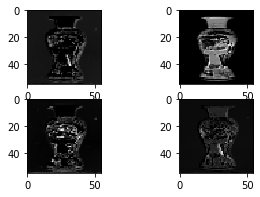

In [129]:
display_activation(activations, 2, 2, 5)


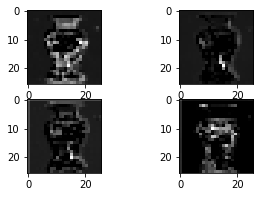

In [130]:
display_activation(activations, 2, 2, 8)


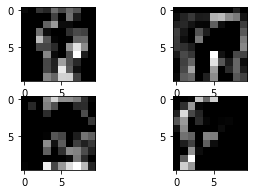

In [131]:
display_activation(activations, 2, 2, 12)


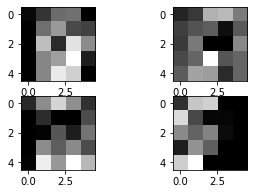

In [132]:
display_activation(activations, 2, 2, 15)


In [ ]:
display_activation(activations, 2, 2, 15)
